## Gaussian Mixture and Leptokurtotic Assets

Mixture of Gaussian distributions is an intuitive way to create 
distributions with skewness and kurtosis by adding 
two or more normal distributions.
Such mixtures can synthesize *leptokurtosis* ("fat tails").

Given the component variances of a GM(n) model it is easy,
given the associated probabilities, to compute the moments
of the resulting mixture. Our problem here is the *inverse*:
from observable statistics, deduce the model parameters.
This has been difficult due to solving tedious simultaneous
equations for the so-called *method of moments problem*.
However, with some simplications, the problem becomes
tractable analytically and can provide insightful
interpretations with concrete probabilities.

We illustrate how a GM(2) model can synthesize Gaussian
risk-equivalence for leptokurtotic financial assets.
Both analytical and numerical solutions are provided.

Appendix 1 confirms our analytical results by simulation.
Also, we gain an experimental understanding of how kurtosis
itself is distributed under small-sample conditions.

Appendix 2 visualizes non-Gaussian distributions
through quantile-quantile (Q-Q) probability plots.

Appendix 3 points to Python package *scikit-learn*
to fit multivariate Gaussian mixtures.

VIEWING: *if you encounter this message,*
[Math Processing Error], *it means
GitHub is timing out on rendering LaTeX equations.
Please view this notebook at*
[Jupyter](http://nbviewer.jupyter.org/github/rsvp/fecon235/blob/master/nb/gauss-mix-kurtosis.ipynb)
instead. Issue [#3](https://github.com/rsvp/fecon235/issues/3)
has been raised in this regard.

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas, sympy

*CHANGE LOG*

    2017-06-02  Visual demo of plotqq() for non-Gaussian distributions.
                   Refactor gm2_* code to module ys_gauss_mix.
    2017-05-08  Edit sympy code. Simulation confirms theory.
    2017-05-05  Solve GM(2) for 2nd and 4th moments.
    2017-05-04  Minor edits.
    2017-05-03  First rough draft.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223d :: Settings and system details
from __future__ import absolute_import, print_function, division
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.13
 ::  IPython 5.1.0
 ::  jupyter_core 4.2.1
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.0
 ::  scipy 0.17.0
 ::  sympy 1.0
 ::  pandas 0.19.2
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.17.0221 develop
 ::  Timestamp: 2017-06-03T12:24:26Z
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


## Gaussian mixture in general and its four moments

We build upon the cumulative distribution function (cdf) $\Phi$ of the standard Gaussian $N(0, 1)$.

For $0\leq p_i \leq 1$ such that $\sum_{i=1}^n{p_i} = 1$, 
we define **Gaussian mixture GM(n)** by the following cdf 
and the associated probability density function (pdf):

$$\begin{aligned}
F_n(x) &= \sum_{i=1}^{n}{p_i}\Phi (\frac{x-\mu_i}{\sigma_i}) \\
f_n(x) &= \sum_{i=1}^{n}{p_i}\phi (x;\mu_i,\sigma_i^2) \\
\phi (x;\mu_i,\sigma_i^2) &= \frac{1}{\sqrt{2\pi}\sigma_i}e^{-{(x-\mu_i)^2}/{(2\sigma_i^2)}}  
\end{aligned}$$

The *intuitive idea* boils down to having n jars, each containing real numbers
which are normally distributed, specified only by their mean and variance. 
We then randomly pick $x$ from the i-th jar with probability $p_i$.
This is essentially how we will later simulate GM(n).

**Proposition 1:** The centralized moments of a Gaussian mixture GM(n) are:

$$\begin{aligned}
\mu &= \sum_{i=1}^{n}{p_i}\mu_i \\
\sigma^2 &= \sum_{i=1}^{n}{p_i}(\sigma_i^2+\mu_i^2)-\mu^2 \\
skewness =: s &= \frac{1}{\sigma^3}\sum_{i=1}^{n}{p_i}(\mu_i-\mu)[3\sigma_i^2+(\mu_i-\mu)^2] \\
kurtosis =: \kappa &= \frac{1}{\sigma^4}\sum_{i=1}^{n}{p_i}[3\sigma_i^4+6(\mu_i-\mu)^2\sigma_i^2+(\mu_i-\mu)^4]
\end{aligned}$$

The history behind Proposition 1 goes back to Pearson (1894).
The algebraic expressions used in solving the ***method of moments***
in general are very tedious, see Cohen (1967) per Wang (2015, section 4.1).

For the standard Gaussian distribution, $s=0$ and $\kappa=3$.
The importance of Proposition 1 is that mixture GM(n) can be a
distribution with values for skewness and kurtosis which are non-standard.

Returns on financial assets are said to be "non-Gaussian."
They are known to be "fat-tailed", or more technically,
***leptokurtotic***: $\kappa > 3$.
This is where our mixture model can be helpful for risk management.

## Moments of the zero-mean GM(2)

We focus our attention to a mixture built with two Gaussians,
and examine its *even* moments, $\sigma^2$ and $\kappa$
by setting the component means $\mu_i$ to zero.
We can later account for a Gaussian mixture GM(2) with non-zero mean 
since the first *odd* moment of a distribution is merely an additive shift,
without any deformation to shape.

**Corollary 1.1:** For $p+q=1$ and $\mu_1=\mu_2=0$, 
the moments of this Gaussian mixture, which we shall call **zero-mean GM(2)**,
are given by:

$$\begin{aligned}
\mu &= 0 \\ 
\sigma^2 &= p\sigma_1^2 + q\sigma_2^2 \\ 
skewness =: s &= 0 \\
kurtosis =: \kappa &= \frac{3}{\sigma^4}[p\sigma_1^4 + q\sigma_2^4]
\end{aligned}$$

**Corollary 1.2:** Combining the equations for even moments,
the following is a necessary condition for the **zero-mean GM(2)**: 

$$\rm K := \frac{\kappa}{3} = \frac{p\sigma_1^4 + q\sigma_2^4}{(p\sigma_1^2 + q\sigma_2^2)^2}$$

Note: Our defined $\rm K$ should not be confused with
Fischer "*excess kurtosis*" := $\kappa-3$
(which is sometimes erroneously reported as the kurtosis statistic).
Our $\kappa$ is also known as the *Pearson* kurtosis.

## Structured zero-mean GM(2)

Given data set {$x$}, we can compute its variance and kurtosis.
Thus, $\sigma$ and $\rm K$ are observable.
Corollary 1.2 says that GM(2) parameters can indeed synthesize $\rm K$,
but its messiness suggests that we impose further structure for clarity.

A sensible requirement is a strict ordering,
$\sigma_1 < \sigma < \sigma_2$
in consideration of the weighted equation for $\sigma^2$.
We can impose this ordering by constrained constants $a$ and $b$.

**Lemma 2.1:** Let $\sigma_1 = a\sigma$ and $b\sigma = \sigma_2$
such that $0<a<1<b$, then for zero-mean GM(2)
the following probability satisfies the condition for *kurtosis*:

$$ p = \frac{\rm K - b^4}{a^4 - b^4}$$

*PROOF*. Substitute the two equalities for $\sigma$ into the kurtosis equation
of Corollary 1.1. Also note that by construction: $q=1-p$.    $\square$

**Lemma 2.2:** Let $\sigma_1 = a\sigma$ and $b\sigma = \sigma_2$
such that $0<a<1<b$, then for zero-mean GM(2)
the following probability satisfies the condition for *variance*:

$$ p = \frac{1 - b^2}{a^2 - b^2}$$

*PROOF*. Substitute the two equalities for $\sigma$ into the $\sigma^2$ equation
of Corollary 1.1. Also note that by construction: $q=1-p$.    $\square$

**Proposition 2:** Let $\sigma_1 = a\sigma$ and $b\sigma = \sigma_2$
such that $0<a<1<b$, then for zero-mean GM(2)
the following satisfies conditions for both *kurtosis* and *variance*:

$$\frac{\rm K - b^4}{a^4 - b^4} = \frac{1 - b^2}{a^2 - b^2}$$

*PROOF*. Immediate from Lemma 2.1 and 2.2.    $\square$

## Analytic strategy and conclusion

Proposition 2 shows how constants $a$ and $b$ are jointly constrained
by the moments of the Gaussian mixture.

Our **strategy** will be to choose $b>1$, then use the kurtosis $\kappa$
to compute $a$. Probability $p$ can then be computed using
Lemma 2.2, for which $q=1-p$ follows.
Since $\sigma_1 = a\sigma$ and $b\sigma = \sigma_2$
the components of our zero-mean GM(2) are fully resolved,
given specific $\sigma$.
This strategy will satisfy the necessary condition derived in Corollary 1.2.

From two observable statistics $\sigma$ and $\kappa$,
we have *deduced*, not fitted, the parameters of a zero-mean GM(2).
An observable mean $\mu$ which is non-zero can be added to
our model to obtain a zero-skew GM(2).

Fitting a general Gaussian mixture is computational very intensive,
and for returns on financial assets, the results are often
not robust (see Appendix 3). Our analytical method of moments
allows us to constrain parameters in a way which has an optimal
interpretation in Hilbert space, which for finance
boils down to the Markowitz mean-variance framework.
(An alternative model of leptokurtosis, the jump-diffusion process,
does not have such an ideal mathematical interpretation.)

---

## Numerically solving Proposition 2

Given $b$ we could analytically solve for $a$ rewriting the solution for quadratic equations.
Instead we shall demostrate the use of Python's sympy package (imported as *sym*) for symbolic mathematics.

In [3]:
gm2_strategy??

Signature: gm2_strategy(kurtosis, b=2)
Source:   
def gm2_strategy(kurtosis, b=2):
    '''Use sympy to solve for "a" in Proposition 2 numerically.
    >>> round( gm2_strategy(7, 2), 4 )
    0.7454
    '''
    #  sym.init_printing(use_unicode=True)
    #  #        ^required if symbolic output is desired.
    a = sym.symbols('a')
    K = kurtosis / 3.0
    #  Use equation from Prop. 2
    LHS = (K - (b**4)) / ((a**4) - (b**4))
    RHS = (1 - (b**2)) / ((a**2) - (b**2))
    a_solved = sym.solveset( sym.Eq(LHS, RHS), a, domain=sym.S.Reals )
    #  ... expect negative and positve real solutions
    #      provided in sympy's FiniteSet format.
    if a_solved == sym.S.EmptySet:
        #               ^when no feasible solution was found in domain.
        #                Do not accept imaginary solutions :-)
        system.die("Argument b could not treat kurtosis; INCREASE b.")
        #     ^dies when kurtosis > 12 and b=2, for example.
        #           SPX returns since 1957 have kurt

In writing the function `gm2_strategy`, we find that
even a numerical solution (as opposed to a symbolic one)
constrained to the real domain (as opposed to the complex) is messy.
Surprisingly, $b$ is not entirely a *free* parameter
since its particular value may be inadmissible when kurtosis is large.
The function will work when $b$ is adjusted slightly higher
when kurtosis is large enough to generate a fatal error.

In [4]:
#  Example of deducing constant "a"
#  using default value for "b":
gm2_strategy(kurtosis=7, b=2)

0.745355992499930

In [6]:
#  Example of deducing constant "a", INTENTIONALLY fatal:

#  gm2_strategy(kurtosis=15, b=2)

 !!  FATAL 1: __main__.py Argument b could not treat kurtosis; INCREASE b.


SystemExit: 1

In [7]:
#  Example of deducing constant "a"
#  and re-adjustment of b given high kurtosis:
gm2_strategy(kurtosis=15, b=2.5)

0.487950036474267

## Numerical solution for GM(2)

So for suitably chosen b, we can implement our strategy
to completely specify our GM(2) model:

In [8]:
gm2_main??

Signature: gm2_main(kurtosis, sigma, b=2)
Source:   
def gm2_main(kurtosis, sigma, b=2):
    '''Compute specs for GM(2) given observable statistics and b.'''
    a = gm2_strategy(kurtosis, b)
    #  Probability p as given in Lemma 2.2:
    p = (1 - (b**2)) / ((a**2) - (b**2))
    #   The returned parameters can then be used in simulations, 
    #   e.g. simug_mix() in lib/yi_simulation.py module,
    #   or for synthetic assets in risk management:
    return [[a, b], [p, a*sigma], [1-p, b*sigma]]
File:      ~/Dropbox/ipy/fecon235/lib/ys_gauss_mix.py
Type:      function


In [9]:
#  Demo of zero-mean GM(2) parameters using gm2_main():
gm2_print(kurtosis=7, sigma=0.13, b=2)

Constants a, b: [0.745355992499930, 2]
GM(2), p:  0.870967741935484
GM(2), sigma1: 0.0968962790249909
GM(2), q:  0.129032258064516
GM(2), sigma2: 0.26


## Numerical application in finance

Suppose we are examining the returns of a financial asset XYZ
and find evidence of a leptokurtotic distribution where $\kappa=7$.
Clearly this is non-Gaussian (though kurtosis estimates
are not known to be stable due to their fourth power).
The annualized volatility was observed to be 13%, 
so $\sigma=0.13$ and we wish to use the GM(2) model
to manage risk.

We establish two synthetic assets on our books to represent XYZ
by our choice of constrained constant $b$:

- XYZ1 with volatility $a\sigma$ where $a=0.7454$ is deduced,
- XYZ2 with volatility $b\sigma$ where $b=2.0000$

The idea here is that XYZ1 models XYZ behaviour
during normal trading (with probability $p=0.8710$),
while XYZ2 models XYZ in an extremely volatile environment
(with probability $q=0.1290$).

Note that if kurtosis should increase, then upon recomputation, 
$q$ will increase because more "fat-tail" risk has emerged.

We can still use our structured zero-mean GM(2) with
*non-zero* mean returns because the mean is an *odd* moment
merely providing an additive shift -- without changing
the *shape* of the distribution. The pressing issue was 
actually getting suitable probability weights $p$ and $q$.

If \$100,000 of XYZ was on our books at 13% volatility, we use the
probability weights to replace it with: 
- \$87,097 of XYZ1 at 9.69% volatility, and
- \$12,903 of XYZ2 at 26% volatility.

Important to emphasize that synthetic assets XYZ1 and XYZ2
are Gaussian assets, so we are free to use the 
optimal linear mean-variance framework,
yet the leptokurtotic risks are approximately covered.
GM models are excellent extensions for
VaR (Value at Risk) evaluations.

---

***Historical note:*** The specifics of the XYZ asset were actually *stylized*
after SPX (S&P 500 index). The volatility from 2012 to 2017 was approximately
12.5%, and during the Great Recession from 2007 to 2012 the volatility was 26.5%.
So $b=2$ is not unreasonable since the volatility was roughly double. 
Round figure of 7 for kurtosis is reasonable, but when ten years is considered
from 2007 to 2017 the overall kurtosis is about 13.5 since
the extreme returns during the Great Recession is combined
with compressed returns of the latter period.

The analytics of leptokurtosis demonstrates that there is a
small chance of double volatility lurking in financial returns every day.

---

***Note on option pricing***: Models for option pricing usually assume
logarithmic returns follow a Gaussian stochastic process, which by
assumption sets Pearson kurtosis rigidly fixed to 3.
By forecasting kurtosis during the life of an option,
we can apply Gaussian mixture techniques to re-evaluate the standard model.
The details will covered in a separate notebook.

---

## Appendix 1: Confirm analytical results using simulation

We now use our simulation module `nb/yi_simulation.py`
with generic GM(2) specifications to see if our "observed" statistics
$\kappa$ and $\sigma$ can be reproduced. 

In [10]:
#  Here is the function for simulating zero-mean GM(2):
simug_mix??

Signature: simug_mix(sigma1, sigma2, q=0.1, N=256)
Source:   
def simug_mix( sigma1, sigma2, q=0.10, N=256 ):
    '''Simulate array from zero-mean Gaussian mixture GM(2).'''
    #     Mathematical details in nb/gauss-mix-kurtosis.ipynb
    #  Pre-populate an array of shape (N,) with the FIRST Gaussian,
    #  so that most work is done quickly and memory efficient...
    arr = simug( sigma1, N )
    #     ... except for some random replacements:
    for i in range(N):
        #                p = 1-q = probability drawing from FIRST Gaussian.
        #  So with probability q, replace an element of arr
        #  with a float from the SECOND Gaussian:
        if maybe( q ):
            arr[i] = randog( sigma2 )
    return arr
File:      ~/Dropbox/ipy/fecon235/lib/yi_simulation.py
Type:      function


In [11]:
#  Use XYZ example to generate sample array of GM(2) mixture:
mix = simug_mix(sigma1=0.096896, sigma2=0.26, q=0.12903, N=2560)

#  Show observed stats:
stat(mix)

                 Y
count  2560.000000
mean      0.005134
std       0.131963
min      -0.674101
25%      -0.068051
50%       0.006167
75%       0.079101
max       0.668929
kurtosis  6.00261


By repeatedly executing the previous block,
we see that sigma (standard deviation) is about 0.13
as expected from our analytics,
but the kurtosis can fluctuate. In small samples,
the fourth power can show up looking like outliers.
The count=2560 corresponds to ten years of daily data.

So *what is kurtosis on average here?*
This is a typical question asked of small-sample distributions.
Let's collect some data from repeatedly running a simulation.

In [12]:
runs = 1000
kurt_samples = np.zeros(runs)

for i in range(runs):
    mix = simug_mix(sigma1=0.096896, sigma2=0.26, q=0.12903, N=2560)
    kurt_samples[i] = kurtfun(mix)
    #                 kurtfun yields Pearson kurtosis "kappa"

stat(kurt_samples)

                 Y
count  1000.000000
mean      6.944915
std       0.708962
min       5.102336
25%       6.455984
50%       6.877510
75%       7.365816
max       9.790339
kurtosis  3.711716


***On average, kurtosis from our experiment is about 7 as expected
from the mathematical propositions.***
In theory, kurtosis should converge to 7 as we increase N,
the number of points per run, and as we increase the number
of simulated runs.

It is very interesting how much kurtosis can fluctuate depending
on the particular sample: its std is about 0.7, so we can expect
to observe kurtosis roughly between 5.6 to 8.4 when
the true kurtosis is 7.

---

## Appendix 2: Visualizing a non-Gaussian distribution

It is helpful to *visualize* the mathematical results above.
The most useful plot for non-Gaussian distributions is
the **Quantile-Quantile** [Q-Q probability plot](https://en.wikipedia.org/wiki/Q–Q_plot).

The default setting for our *plotqq()* procedure will
graphically compare the distribution of observed data
against a theoretical Normal distribution.
Details are covered in module `lib/yi_plot.py`.

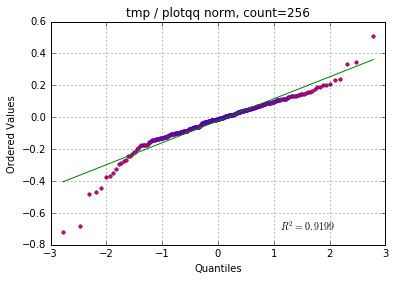

                Y
count  256.000000
mean    -0.022010
std      0.142689
min     -0.720196
25%     -0.094655
50%     -0.011186
75%      0.063604
max      0.511783
kurtosis  7.51103


In [13]:
#  Generate GM(2) mixture, with unconstrained mean mu, and use
#  parameters from XYZ example to generate a small sample array:
mu = 0
sigma = 0.13
b = 2  # By construction, b > 1.
mumix = mu + simug_mix(sigma1=0.096896, sigma2=b*sigma, q=0.12903, N=256)

plotqq( mumix )
stat( mumix )

If the observed values truly came from a normal distribution,
most of the plotted points should be along the solid green line.
Points far from the line are usually identified as *outliers*, but
for leptokurtotic distributions such points in the tails are to be expected.
Statistical tests for normality are essentially testing
deviations from the green line ($R^2$ shown within the plot
derives from linear regression and should not be
considered a serious test statistic).

The last cell simulates a small-sample (N=256, say, one year of daily data)
where kurtosis is exactly 7 in theory.
***We highly recommend re-running the cell using different parameter values***,
including unconstrained mean mu, **to visually understand
how Q-Q plots can appear so vastly different in practice
even when the generating dynamics are fully known**.
When applying *plotqq()* to actual returns of financial assets,
one should be able to recognize plots where a GM(2) model
is appropriate.

The *stat(mix)* output illustrates how much statistical estimates of a
Gaussian mixture sample can differ from their theoretical values,
especially when the sample size is small.
Such variability is noteworthy when we base portfolio decisions
on estimated statistics mistaken for being stable.

---

##  Appendix 3: Fitting Gaussian mixtures using scikit-learn

This notebook imposed structure on GM(2) to discern its
parametric relationships in theory. From two observable statistics
we deduced a reasonable shape for a Gaussian mixture
stylized by actual financial returns.

Given several assets, our plain $\sigma$ must be generalized
to a covariance matrix. Python via *scikit-learn* offers
code to fit unconstrained mixtures.
For starters, please see to http://scikit-learn.org/stable/modules/mixture.html

Tiago Ramalho wrote a
[quick introduction](http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python)
to Gaussian mixture models with Python.

## References

Cohen, A.C. (1967) Estimation in mixtures of two normal distributions.
*Technometrika* 9:15–28.

Pearson, K. (1894) Contributions to the theory of mathematical evolution.
*Philosophical Trans. Roy. Soc. London* A185:71–110.

Wang, Jin (2015), [Multivariate Mixtures of Normal Distributions: Properties, Random Vector Generation, Fitting, and as Models of Market Daily Changes](https://www.researchgate.net/profile/Jin_Wang40/publication/274695842_Multivariate_Mixtures_of_Normal_Distributions_Properties_Random_Vector_Generation_Fitting_and_as_Models_of_Market_Daily_Changes/links/5525314c0cf22e181e73ee4f.pdf), Journal on Computing, Vol. 27, No. 2, Spring 2015, pp. 193–203. Cf. earlier version, Wang (2000), [Modeling and Generating Daily Changes in Market Variables Using A Multivariate Mixture of Normal Distributions](http://ww2.valdosta.edu/~jwang/paper/MixNormal.pdf).

Thanks for corrected [skew equation](http://onlyvix.blogspot.com/2011/05/mixture-of-normal-formulas-for-skew-and.html) to @onlyvixx, and jwang@valdosta.edu.